# Time Series

**Name**: Corpuz, Micki Laurren B.

**Section**: CPE22S3

**Instructor**: Engr. Roman Richard

### About the Data
In this notebook, we will be working with 5 data sets:
* (CSV) Facebook's stock price daily throughout 2018 (obtained using the stock_analysis package).
* (CSV) Facebook's OHLC stock data from May 20, 2019 - May 24, 2019 per minute from Nasdaq.com.
* (CSV) melted stock data for Facebook from May 20, 2019 - May 24, 2019 per minute from Nasdaq.com.
* (DB) stock opening prices by the minute for Apple from May 20, 2019 - May 24, 2019 altered to have seconds in the time from Nasdaq.com.
* (DB) stock opening prices by the minute for Facebook from May 20, 2019 - May 24, 2019 from Nasdaq.com.

# Setup

In [2]:
import numpy as np
import pandas as pd
fb = pd.read_csv('fb_2018.csv', index_col='date', parse_dates=True).assign(
  trading_volume=lambda x: pd.cut(x.volume, bins=3, labels=['low', 'med', 'high'])
)
fb.head()
# Makes new columns that identify volume intensity

,open,high,low,close,volume,trading_volume
date,,,,,,
2018-01-02,177.68,181.58,177.5500,181.42,18151903,low
2018-01-03,181.88,184.78,181.3300,184.67,16886563,low
2018-01-04,184.90,186.21,184.0996,184.33,13880896,low
2018-01-05,185.59,186.90,184.9300,186.85,13574535,low
2018-01-08,187.20,188.90,186.3300,188.28,17994726,low


# Time-based selection and filtering
Remember, when we have a DatetimeIndex , we can use datetime slicing. We can provide a range of dates. We only get three days back because the stock market is
closed on the weekends:


In [5]:
fb['2018-10-11':'2018-10-15']
# date slicing

,open,high,low,close,volume,trading_volume
date,,,,,,
2018-10-11,150.13,154.81,149.1600,153.35,35338901,low
2018-10-12,156.73,156.89,151.2998,153.74,25293492,low
2018-10-15,153.32,155.57,152.5500,153.52,15433521,low


We can select ranges of months and quarters

In [14]:
# fb['2018-q1'].equals(fb['2018-01':'2018-03']) raises error
fb.loc['2018Q1'].equals(fb.loc['2018-01':'2018-03']) # I searched for an updated syntax for my versions
# Comparing

True

The first() method will give us a specified length of time from the beginning of the time series. Here, we ask for a week. January 1, 2018 was a holiday—meaning the
market was closed. It was also a Monday, so the week here is only four days:

In [17]:
fb.first('1W')
# GEts the 1 st week

C:\Users\micki\AppData\Local\Temp\ipykernel_13752\3644223734.py:1: FutureWarning: first is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  fb.first('1W')


,open,high,low,close,volume,trading_volume
date,,,,,,
2018-01-02,177.68,181.58,177.5500,181.42,18151903,low
2018-01-03,181.88,184.78,181.3300,184.67,16886563,low
2018-01-04,184.90,186.21,184.0996,184.33,13880896,low
2018-01-05,185.59,186.90,184.9300,186.85,13574535,low


The last() method will take from the end:

In [20]:
fb.last('1W')
# gets the last week

C:\Users\micki\AppData\Local\Temp\ipykernel_13752\555493495.py:1: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  fb.last('1W')


,open,high,low,close,volume,trading_volume
date,,,,,,
2018-12-31,134.45,134.64,129.95,131.09,24625308,low


For the next few examples, we need datetimes, so we will read in the stock data per minute file:

In [25]:
stock_data_per_minute = pd.read_csv(
 'fb_week_of_may_20_per_minute.csv', index_col='date', parse_dates=True,
 date_parser=lambda x: pd.to_datetime(x, format='%Y-%m-%d %H-%M')
)
stock_data_per_minute.head()

C:\Users\micki\AppData\Local\Temp\ipykernel_13752\1785798962.py:1: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  stock_data_per_minute = pd.read_csv(


,open,high,low,close,volume
date,,,,,
2019-05-20 09:30:00,181.6200,181.6200,181.6200,181.6200,159049.0
2019-05-20 09:31:00,182.6100,182.6100,182.6100,182.6100,468017.0
2019-05-20 09:32:00,182.7458,182.7458,182.7458,182.7458,97258.0
2019-05-20 09:33:00,182.9500,182.9500,182.9500,182.9500,43961.0
2019-05-20 09:34:00,183.0600,183.0600,183.0600,183.0600,79562.0


We can use the Grouper to roll up our data to the daily level along with first and last :

In [28]:
stock_data_per_minute.groupby(pd.Grouper(freq='1D')).agg({
 'open': 'first',
 'high': 'max',
 'low': 'min',
 'close': 'last',
 'volume': 'sum'
})
# group by and agg mythod combination for aggregation

,open,high,low,close,volume
date,,,,,
2019-05-20,181.62,184.1800,181.6200,182.72,10044838.0
2019-05-21,184.53,185.5800,183.9700,184.82,7198405.0
2019-05-22,184.81,186.5603,184.0120,185.32,8412433.0
2019-05-23,182.50,183.7300,179.7559,180.87,12479171.0
2019-05-24,182.33,183.5227,181.0400,181.06,7686030.0


The at_time() method allows us to pull out all datetimes that match a certain time. Here, we can grab all the rows from the time the stock market opens (930 AM):

In [31]:
stock_data_per_minute.at_time('9:30')
# gets data whose time is on 9 30

,open,high,low,close,volume
date,,,,,
2019-05-20 09:30:00,181.62,181.62,181.62,181.62,159049.0
2019-05-21 09:30:00,184.53,184.53,184.53,184.53,58171.0
2019-05-22 09:30:00,184.81,184.81,184.81,184.81,41585.0
2019-05-23 09:30:00,182.50,182.50,182.50,182.50,121930.0
2019-05-24 09:30:00,182.33,182.33,182.33,182.33,52681.0


We can use between_time() to grab data for the last two minutes of trading daily:

In [34]:
stock_data_per_minute.between_time('15:59', '16:00')
# gets time betweek 15;59 to 16;00

,open,high,low,close,volume
date,,,,,
2019-05-20 15:59:00,182.915,182.915,182.915,182.915,134569.0
2019-05-20 16:00:00,182.720,182.720,182.720,182.720,1113672.0
2019-05-21 15:59:00,184.840,184.840,184.840,184.840,61606.0
2019-05-21 16:00:00,184.820,184.820,184.820,184.820,801080.0
2019-05-22 15:59:00,185.290,185.290,185.290,185.290,96099.0
2019-05-22 16:00:00,185.320,185.320,185.320,185.320,1220993.0
2019-05-23 15:59:00,180.720,180.720,180.720,180.720,109648.0
2019-05-23 16:00:00,180.870,180.870,180.870,180.870,1329217.0
2019-05-24 15:59:00,181.070,181.070,181.070,181.070,52994.0


On average, are more shares traded within the first 30 minutes of trading or in the last 30 minutes? We can combine between_time() with Groupers and filter()

from the aggregation.ipynb notebook to answer this question. For the week in question, more are traded on average around opening time than closing time:

In [37]:
shares_traded_in_first_30_min = stock_data_per_minute\
 .between_time('9:30', '10:00')\
 .groupby(pd.Grouper(freq='1D'))\
 .filter(lambda x: (x.volume > 0).all())\
 .volume.mean()
shares_traded_in_last_30_min = stock_data_per_minute\
 .between_time('15:30', '16:00')\
 .groupby(pd.Grouper(freq='1D'))\
 .filter(lambda x: (x.volume > 0).all())\
 .volume.mean()
shares_traded_in_first_30_min - shares_traded_in_last_30_min
# difference of values in first 30 mins minus the last 30 mins

18592.967741935485

In cases where time doesn't matter, we can normalize the times to midnight:

In [40]:
pd.DataFrame(
 dict(before=stock_data_per_minute.index, after=stock_data_per_minute.index.normalize())
).head()
# THis converts datetime to normal data

,before,after
0,2019-05-20 09:30:00,2019-05-20
1,2019-05-20 09:31:00,2019-05-20
2,2019-05-20 09:32:00,2019-05-20
3,2019-05-20 09:33:00,2019-05-20
4,2019-05-20 09:34:00,2019-05-20


Note that we can also use normalize() on a Series object after accessing the dt attribute:

In [43]:
stock_data_per_minute.index.to_series().dt.normalize().head()

date
2019-05-20 09:30:00   2019-05-20
2019-05-20 09:31:00   2019-05-20
2019-05-20 09:32:00   2019-05-20
2019-05-20 09:33:00   2019-05-20
2019-05-20 09:34:00   2019-05-20
Name: date, dtype: datetime64[ns]

# Shifting for lagged data
We can use shift() to create some lagged data. By default, the shift will be one period. For example, we can use shift() to create a new column that indicates the
previous day's closing price. From this new column, we can calculate the price change due to after hours trading (after the close one day right up to the open the following
day):

In [46]:
fb.assign(
 prior_close=lambda x: x.close.shift(),
 after_hours_change_in_price=lambda x: x.open - x.prior_close,
 abs_change=lambda x: x.after_hours_change_in_price.abs()
).nlargest(5, 'abs_change')

,open,high,low,close,volume,trading_volume,prior_close,after_hours_change_in_price,abs_change
date,,,,,,,,,
2018-07-26,174.89,180.13,173.75,176.26,169803668,high,217.50,-42.61,42.61
2018-04-26,173.22,176.27,170.80,174.16,77556934,med,159.69,13.53,13.53
2018-01-12,178.06,181.48,177.40,179.37,77551299,med,187.77,-9.71,9.71
2018-10-31,155.00,156.40,148.96,151.79,60101251,low,146.22,8.78,8.78
2018-03-19,177.01,177.17,170.06,172.56,88140060,med,185.09,-8.08,8.08


The tshift() method will shift the DatetimeIndex rather than the data. However, if the goal is to to add/subtract time we can use pd.Timedelta :

In [49]:
pd.date_range('2018-01-01', freq='D', periods=5) + pd.Timedelta('9 hours 30 minutes')
# indexing from 01 by 5

DatetimeIndex(['2018-01-01 09:30:00', '2018-01-02 09:30:00',
               '2018-01-03 09:30:00', '2018-01-04 09:30:00',
               '2018-01-05 09:30:00'],
              dtype='datetime64[ns]', freq='D')

When working with stock data, we only have data for the dates the market was open. We can use first_valid_index() to give us the index of the first non-null entry in
our data. For September 2018, this is September 4th:

In [56]:
# fb['2018-09'].first_valid_index()
fb.loc['2018-09'].first_valid_index() 

Timestamp('2018-09-04 00:00:00')

Conversely, we can use last_valid_index() to get the last entry of non-null data. For September 2018, this is September 28th:


In [61]:
# fb['2018-09'].last_valid_index()
fb.loc['2018-09'].last_valid_index()

Timestamp('2018-09-28 00:00:00')

We can use asof() to find the last non-null data before the point we are looking for, if it isn't in the index. From the previous result, we know that the market was not open
on September 30th. It also isn't in the index:

If we ask for it, we will get the data from the index we got from fb['2018-09'].last_valid_index() , which was September 28th:

In [65]:
fb.asof('2018-09-30')

open                168.33
high                168.79
low                 162.56
close               164.46
volume            34265638
trading_volume         low
Name: 2018-09-30 00:00:00, dtype: object

# Differenced data
Using the diff() method is a quick way to calculate the difference between the data and a lagged version of it. By default, it will yield the result of data -
data.shift() :

In [68]:
(
 fb.drop(columns='trading_volume')
 - fb.drop(columns='trading_volume').shift()
).equals(
 fb.drop(columns='trading_volume').diff()
)


True

We can use this to see how Facebook stock changed day-over-day:

In [71]:
fb.drop(columns='trading_volume').diff().head()

,open,high,low,close,volume
date,,,,,
2018-01-02,NaN,NaN,NaN,NaN,NaN
2018-01-03,4.20,3.20,3.7800,3.25,-1265340.0
2018-01-04,3.02,1.43,2.7696,-0.34,-3005667.0
2018-01-05,0.69,0.69,0.8304,2.52,-306361.0
2018-01-08,1.61,2.00,1.4000,1.43,4420191.0


We can specify the number of periods, can be any positive or negative integer:

In [74]:
fb.drop(columns='trading_volume').diff(-3).head()

,open,high,low,close,volume
date,,,,,
2018-01-02,-7.91,-5.32,-7.3800,-5.43,4577368.0
2018-01-03,-5.32,-4.12,-5.0000,-3.61,-1108163.0
2018-01-04,-3.80,-2.59,-3.0004,-3.54,1487839.0
2018-01-05,-1.35,-0.99,-0.7000,-0.99,3044641.0
2018-01-08,-1.20,0.50,-1.0500,0.51,8406139.0


# Resampling
Sometimes the data is at a granularity that isn't conducive to our analysis. Consider the case where we have data per minute for the full year of 2018. Let's see what happens
if we try to plot this.

Plotting will be covered in the next module, so don't worry too much about the code.

First, we import matplotlib for plotting:

In [77]:
import matplotlib.pyplot as plt

Then we will look at the plot at the minute level and at the daily aggregated level (summed):

C:\Users\micki\AppData\Local\Temp\ipykernel_13752\601178651.py:2: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  index = pd.date_range('2018-01-01', freq='T', periods=365*24*60)


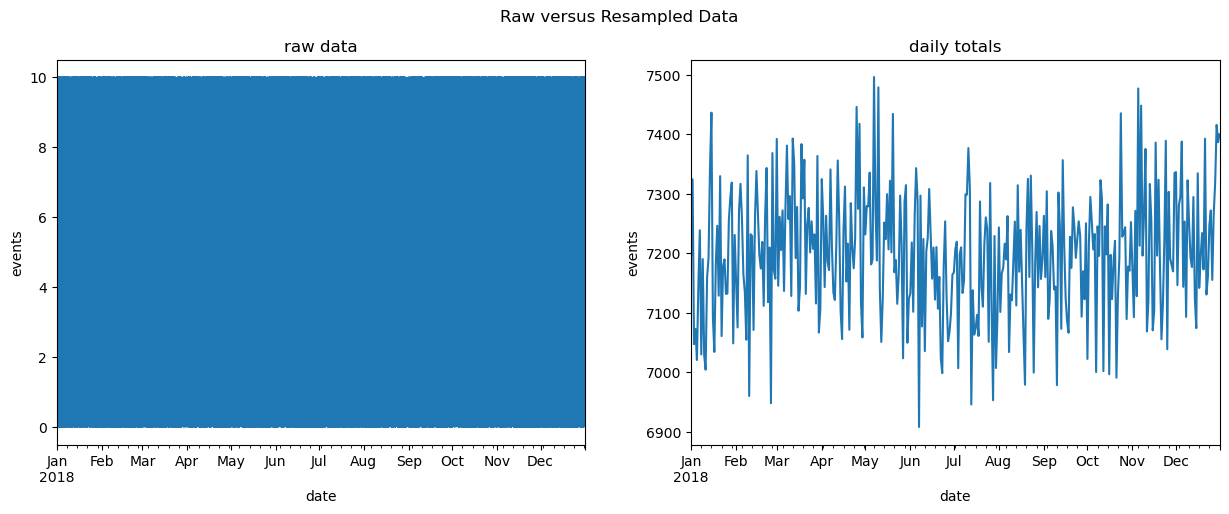

In [83]:
np.random.seed(0)
index = pd.date_range('2018-01-01', freq='T', periods=365*24*60)
raw = pd.DataFrame(
 np.random.uniform(0, 10, size=index.shape[0]), index=index
)
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
raw.plot(legend=False, ax=axes[0], title='raw data')
raw.resample('1D').sum().plot(legend=False, ax=axes[1], title='daily totals')
for ax in axes:
 ax.set_xlabel('date')
 ax.set_ylabel('events')

plt.suptitle('Raw versus Resampled Data')
plt.show()

# shows the minute level and the daily agg level with subplots

The plot on the left has so much data we can't see anything. However, when we aggregate to the daily totals, we see the data. We can alter the granularity of the data we are
working with using resampling. Recall our minute-by-minute stock data:

In [87]:
stock_data_per_minute.head()

,open,high,low,close,volume
date,,,,,
2019-05-20 09:30:00,181.6200,181.6200,181.6200,181.6200,159049.0
2019-05-20 09:31:00,182.6100,182.6100,182.6100,182.6100,468017.0
2019-05-20 09:32:00,182.7458,182.7458,182.7458,182.7458,97258.0
2019-05-20 09:33:00,182.9500,182.9500,182.9500,182.9500,43961.0
2019-05-20 09:34:00,183.0600,183.0600,183.0600,183.0600,79562.0


We can resample this to get to a daily frequency

In [90]:
stock_data_per_minute.resample('1D').agg({
 'open': 'first',
 'high': 'max',
 'low': 'min',
 'close': 'last',
 'volume': 'sum'
})


,open,high,low,close,volume
date,,,,,
2019-05-20,181.62,184.1800,181.6200,182.72,10044838.0
2019-05-21,184.53,185.5800,183.9700,184.82,7198405.0
2019-05-22,184.81,186.5603,184.0120,185.32,8412433.0
2019-05-23,182.50,183.7300,179.7559,180.87,12479171.0
2019-05-24,182.33,183.5227,181.0400,181.06,7686030.0


We can downsample to quarterly data:

In [103]:
# fb.resample('Q').mean()
# Resample only numeric columns to compute quarterly means and avoid TypeError from non-numeric data
fb.select_dtypes(include='number').resample('Q-DEC').mean()

C:\Users\micki\AppData\Local\Temp\ipykernel_13752\3106345863.py:3: FutureWarning: 'Q-DEC' is deprecated and will be removed in a future version, please use 'QE-DEC' instead.
  fb.select_dtypes(include='number').resample('Q-DEC').mean()


,open,high,low,close,volume
date,,,,,
2018-03-31,179.472295,181.794659,177.040428,179.551148,3.292640e+07
2018-06-30,180.373770,182.277689,178.595964,180.704688,2.405532e+07
2018-09-30,180.812130,182.890886,178.955229,181.028492,2.701982e+07
2018-12-31,145.272460,147.620121,142.718943,144.868730,2.697433e+07


We can also use apply() . Here, we show the quarterly change from start to end:

In [112]:
fb.drop(columns='trading_volume').resample('Q').apply(
 lambda x: x.last('1D').values - x.first('1D').values
)

# There is a bunch of warning about the methods pandas plans to remove soon.

C:\Users\micki\AppData\Local\Temp\ipykernel_13752\1586553122.py:1: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  fb.drop(columns='trading_volume').resample('Q').apply(
C:\Users\micki\AppData\Local\Temp\ipykernel_13752\1586553122.py:2: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  lambda x: x.last('1D').values - x.first('1D').values
C:\Users\micki\AppData\Local\Temp\ipykernel_13752\1586553122.py:2: FutureWarning: first is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  lambda x: x.last('1D').values - x.first('1D').values
C:\Users\micki\AppData\Local\Temp\ipykernel_13752\1586553122.py:2: FutureWarning: last is deprecated and will be removed in a future version. Please create a mask and filter using `.loc` instead
  lambda x: x.last('1D').values - x.first('1D').values
C:\Users\micki\AppData\Loc

date
2018-03-31    [[-22.53, -20.160000000000025, -23.41000000000...
2018-06-30    [[39.50999999999999, 38.399700000000024, 39.84...
2018-09-30    [[-25.039999999999992, -28.659999999999997, -2...
2018-12-31    [[-28.580000000000013, -31.24000000000001, -31...
Freq: QE-DEC, dtype: object

Consider the following melted stock data by the minute. We don't see the OHLC data directly:

In [115]:
melted_stock_data = pd.read_csv('melted_stock_data.csv', index_col='date', parse_dates=True)
melted_stock_data.head()

,price
date,
2019-05-20 09:30:00,181.6200
2019-05-20 09:31:00,182.6100
2019-05-20 09:32:00,182.7458
2019-05-20 09:33:00,182.9500
2019-05-20 09:34:00,183.0600


We can use the ohlc() method after resampling to recover the OHLC columns:

In [118]:
melted_stock_data.resample('1D').ohlc()['price']

,open,high,low,close
date,,,,
2019-05-20,181.62,184.1800,181.6200,182.72
2019-05-21,184.53,185.5800,183.9700,184.82
2019-05-22,184.81,186.5603,184.0120,185.32
2019-05-23,182.50,183.7300,179.7559,180.87
2019-05-24,182.33,183.5227,181.0400,181.06


Alternatively, we can upsample to increase the granularity. Note this will introduce NaN values

In [121]:
fb.resample('6H').asfreq().head()

C:\Users\micki\AppData\Local\Temp\ipykernel_13752\2962105639.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fb.resample('6H').asfreq().head()


,open,high,low,close,volume,trading_volume
date,,,,,,
2018-01-02 00:00:00,177.68,181.58,177.55,181.42,18151903.0,low
2018-01-02 06:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-02 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-02 18:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-03 00:00:00,181.88,184.78,181.33,184.67,16886563.0,low


There are many ways to handle these NaN values. We can forward-fill with pad() :

In [126]:
# fb.resample('6H').pad().head()

# Resample to 6-hour intervals, forward-filling missing values
fb.resample('6h').ffill().head()

,open,high,low,close,volume,trading_volume
date,,,,,,
2018-01-02 00:00:00,177.68,181.58,177.55,181.42,18151903,low
2018-01-02 06:00:00,177.68,181.58,177.55,181.42,18151903,low
2018-01-02 12:00:00,177.68,181.58,177.55,181.42,18151903,low
2018-01-02 18:00:00,177.68,181.58,177.55,181.42,18151903,low
2018-01-03 00:00:00,181.88,184.78,181.33,184.67,16886563,low


We can specify a specific value or a method with fillna() :

In [129]:
fb.resample('6H').fillna('nearest').head()

C:\Users\micki\AppData\Local\Temp\ipykernel_13752\3498320007.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fb.resample('6H').fillna('nearest').head()
C:\Users\micki\AppData\Local\Temp\ipykernel_13752\3498320007.py:1: FutureWarning: DatetimeIndexResampler.fillna is deprecated and will be removed in a future version. Use obj.ffill(), obj.bfill(), or obj.nearest() instead.
  fb.resample('6H').fillna('nearest').head()


,open,high,low,close,volume,trading_volume
date,,,,,,
2018-01-02 00:00:00,177.68,181.58,177.55,181.42,18151903,low
2018-01-02 06:00:00,177.68,181.58,177.55,181.42,18151903,low
2018-01-02 12:00:00,181.88,184.78,181.33,184.67,16886563,low
2018-01-02 18:00:00,181.88,184.78,181.33,184.67,16886563,low
2018-01-03 00:00:00,181.88,184.78,181.33,184.67,16886563,low


We can use asfreq() and assign() to specify the action per column:

In [132]:
fb.resample('6H').asfreq().assign(
 volume=lambda x: x.volume.fillna(0), # put 0 when market is closed
 close=lambda x: x.close.fillna(method='ffill'), # carry forward
 # take the closing price if these aren't available
 open=lambda x: np.where(x.open.isnull(), x.close, x.open),
 high=lambda x: np.where(x.high.isnull(), x.close, x.high),
 low=lambda x: np.where(x.low.isnull(), x.close, x.low)
).head()

C:\Users\micki\AppData\Local\Temp\ipykernel_13752\2081602865.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  fb.resample('6H').asfreq().assign(
C:\Users\micki\AppData\Local\Temp\ipykernel_13752\2081602865.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  close=lambda x: x.close.fillna(method='ffill'), # carry forward


,open,high,low,close,volume,trading_volume
date,,,,,,
2018-01-02 00:00:00,177.68,181.58,177.55,181.42,18151903.0,low
2018-01-02 06:00:00,181.42,181.42,181.42,181.42,0.0,NaN
2018-01-02 12:00:00,181.42,181.42,181.42,181.42,0.0,NaN
2018-01-02 18:00:00,181.42,181.42,181.42,181.42,0.0,NaN
2018-01-03 00:00:00,181.88,184.78,181.33,184.67,16886563.0,low


# Merging
We saw merging examples the querying_and_merging notebook. However, they all matched based on keys. With time series, it is possible that they are so granular that we
never have the same time for multiple entries. Let's work with some stock data at different granularities

In [135]:
import sqlite3
with sqlite3.connect('stocks.db') as connection:
 fb_prices = pd.read_sql(
 'SELECT * FROM fb_prices', connection,
 index_col='date', parse_dates=['date']
 )
 aapl_prices = pd.read_sql(
 'SELECT * FROM aapl_prices', connection,
 index_col='date', parse_dates=['date']
 )

The Facebook prices are at the minute granularity:

In [138]:
fb_prices.index.second.unique()

Index([0], dtype='int32', name='date')

However, the Apple prices have information for the second:

In [141]:
aapl_prices.index.second.unique()

Index([ 0, 52, 36, 34, 55, 35,  7, 12, 59, 17,  5, 20, 26, 23, 54, 49, 19, 53,
       11, 22, 13, 21, 10, 46, 42, 38, 33, 18, 16,  9, 56, 39,  2, 50, 31, 58,
       48, 24, 29,  6, 47, 51, 40,  3, 15, 14, 25,  4, 43,  8, 32, 27, 30, 45,
        1, 44, 57, 41, 37, 28],
      dtype='int32', name='date')

We can perform an asof merge to try to line these up the best we can. We specify how to handle the mismatch with the direction and tolerance parameters. We will
fill in with the direction of nearest and a tolerance of 30 seconds. This will place the Apple data with the minute that it is closest to, so 93152 will go with 932
and 93707 will go with 937. Since the times are on the index, we pass left_index and right_index , as we did with merges earlier this chapter:

In [144]:
pd.merge_asof(
 fb_prices, aapl_prices,
 left_index=True, right_index=True, # datetimes are in the index
 # merge with nearest minute
 direction='nearest', tolerance=pd.Timedelta(30, unit='s')
).head()

,FB,AAPL
date,,
2019-05-20 09:30:00,181.6200,183.5200
2019-05-20 09:31:00,182.6100,NaN
2019-05-20 09:32:00,182.7458,182.8710
2019-05-20 09:33:00,182.9500,182.5000
2019-05-20 09:34:00,183.0600,182.1067


If we don't want to lose the seconds information with the Apple data, we can use pd.merge_ordered() instead, which will interleave the two. Note this is an outer join by
default ( how parameter). The only catch here is that we need to reset the index in order to join on it:

In [147]:
pd.merge_ordered(
 fb_prices.reset_index(), aapl_prices.reset_index()
).set_index('date').head()

,FB,AAPL
date,,
2019-05-20 09:30:00,181.6200,183.520
2019-05-20 09:31:00,182.6100,NaN
2019-05-20 09:31:52,NaN,182.871
2019-05-20 09:32:00,182.7458,NaN
2019-05-20 09:32:36,NaN,182.500


We can pass a fill_method to handle NaN values:

In [150]:
pd.merge_ordered(
 fb_prices.reset_index(), aapl_prices.reset_index(),
 fill_method='ffill'
).set_index('date').head()

,FB,AAPL
date,,
2019-05-20 09:30:00,181.6200,183.520
2019-05-20 09:31:00,182.6100,183.520
2019-05-20 09:31:52,182.6100,182.871
2019-05-20 09:32:00,182.7458,182.871
2019-05-20 09:32:36,182.7458,182.500


Alternatively, we can use fillna() .


















































